In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier



In [2]:
data='train.csv'
df=pd.read_csv(data)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Data Cleaning

In [3]:
print("Categorical Var:")
Categorical_Var=df.select_dtypes(include=['object']).columns
for col in Categorical_Var:
    print(col)


Categorical Var:
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [4]:
print("Numerical Var:")
Numerical_Var=df._get_numeric_data().columns
for col in Numerical_Var:
    print(col)

Numerical Var:
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


In [5]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [6]:
for col in df.columns:
    print(col,df[col].isnull().sum())

PassengerId 0
HomePlanet 201
CryoSleep 217
Cabin 199
Destination 182
Age 179
VIP 203
RoomService 181
FoodCourt 183
ShoppingMall 208
Spa 183
VRDeck 188
Name 200
Transported 0


In [7]:
for cat_col in Categorical_Var:
    df[cat_col].fillna(df[cat_col].mode()[0], inplace=True)


In [8]:
for cat_col in Categorical_Var:
    if cat_col!="Name":
        print(cat_col,df[cat_col].isnull().sum())


PassengerId 0
HomePlanet 0
CryoSleep 0
Cabin 0
Destination 0
VIP 0


In [9]:
for num_col in Numerical_Var:
    df[num_col].fillna(df[num_col].mode()[0], inplace=True)

In [10]:
for num_col in Numerical_Var:
    print(num_col,df[num_col].isnull().sum())


Age 0
RoomService 0
FoodCourt 0
ShoppingMall 0
Spa 0
VRDeck 0
Transported 0


Analysis -> Data Exploration,Feature Engineering,Data Visualization

In [11]:
df.info

<bound method DataFrame.info of      PassengerId HomePlanet  CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa      False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth      False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa      False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa      False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth      False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...        ...       ...            ...   ...    ...   
8688     9276_01     Europa      False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth       True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth      False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa      False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa      False   E/608/S    TRAPPIST-1e  44.0  False   

      R

In [12]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.728517,220.009318,448.434027,169.572300,304.588865,298.261820
std,14.355438,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [13]:
Categorical_Var=df.select_dtypes(include=['object']).columns

In [14]:
Categorical_Var

Index(['PassengerId', 'HomePlanet', 'Cabin', 'Destination', 'Name'], dtype='object')

In [15]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [16]:
Numerical_Var=list(Numerical_Var)
if 'train' in data:
    Numerical_Var.remove('Transported')

In [17]:
df[Numerical_Var].columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

<AxesSubplot: title={'center': 'VIP'}>

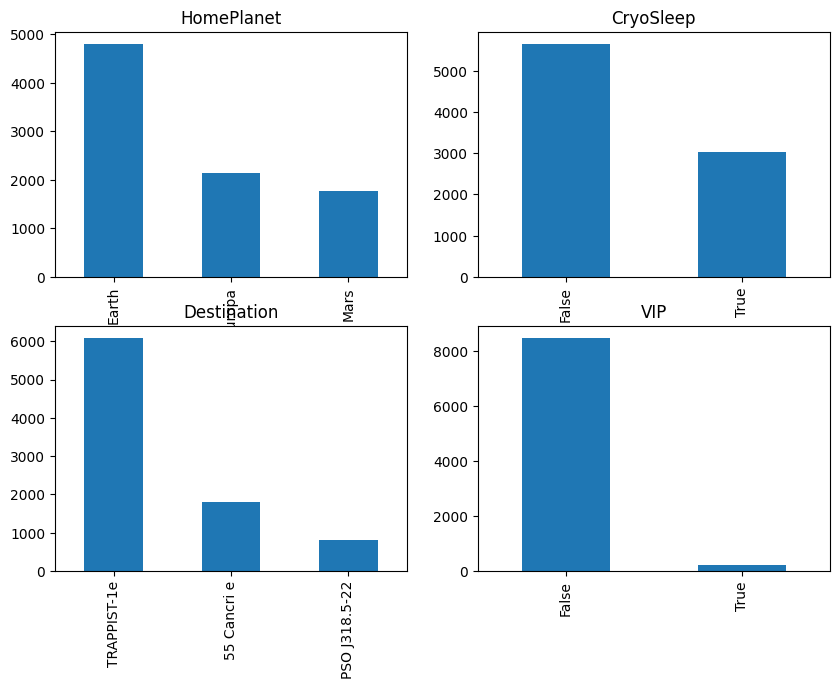

In [18]:
fig = plt.figure(figsize =(10, 7))
plt.subplot(2,2,1)
df['HomePlanet'].value_counts().plot(kind='bar',title='HomePlanet')
plt.subplot(2,2,2)
df['CryoSleep'].value_counts().plot(kind='bar',title='CryoSleep')
plt.subplot(2,2,3)
df['Destination'].value_counts().plot(kind='bar',title='Destination')
plt.subplot(2,2,4)
df['VIP'].value_counts().plot(kind='bar',title='VIP')


In [19]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [20]:
df['Deck']=df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
df['Port']=df['Cabin'].apply(lambda s: s[-1] if pd.notnull(s) else 'M')
df['Deck']=df['Deck'].map({'B':0,'F':1,'A':2,'G':3,'E':4,'D':5,'C':6,'T':7}).astype(int)
df['Port']=df['Port'].map({'P':0,'S':1}).astype(int)
df.drop(['Cabin'],axis=1,inplace=True)



In [21]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Port
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,2,1
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2,1
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,1


In [22]:
df['HomePlanet']=df['HomePlanet'].map({'Earth':0,'Europa':1,'Mars':2}).astype(int)


In [23]:
unique_destination=df['Destination'].unique()
df['Destination']=df['Destination'].map(dict(zip(unique_destination,list(range(len(unique_destination)))))).astype(int)

In [24]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Port
0,0001_01,1,False,0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,0
1,0002_01,0,False,0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,1
2,0003_01,1,False,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,2,1
3,0003_02,1,False,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2,1
4,0004_01,0,False,0,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,1


In [25]:
print(df['HomePlanet'].unique())
print(df['Destination'].unique())

[1 0 2]
[0 1 2]


In [26]:
if 'train' in data:
    df.drop(['Name'],axis=1,inplace=True)

In [27]:
unique_VIP=df['VIP'].unique()
df['VIP']=df['VIP'].map(dict(zip(unique_VIP,list(range(len(unique_VIP)))))).astype(int)

In [28]:
df['VIP'].unique()

array([0, 1])

In [29]:
unique_CryoSleep=df['CryoSleep'].unique()
df['CryoSleep']=df['CryoSleep'].map(dict(zip(unique_VIP,list(range(len(unique_VIP)))))).astype(int)

In [30]:
df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,1,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0002_01,0,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,1,1
2,0003_01,1,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,0003_02,1,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0004_01,0,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,2,41.0,1,0.0,6819.0,0.0,1643.0,74.0,False,2,0
8689,9278_01,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,False,3,1
8690,9279_01,0,0,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,True,3,1
8691,9280_01,1,0,2,32.0,0,0.0,1049.0,0.0,353.0,3235.0,False,4,1


In [31]:
X=df.drop("Transported",axis=1).values
y=df["Transported"].values

In [32]:
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.2, random_state=42)
train_X.shape,train_y.shape,test_X.shape,test_y.shape

((6954, 13), (6954,), (1739, 13), (1739,))

Modelling

In [33]:
rf_model=RandomForestClassifier()
rf_model.fit(train_X,train_y)
rf_pred=rf_model.score(test_X,test_y)

In [34]:
print("Random Forest accuracy:",rf_pred)

Random Forest accuracy: 0.7906843013225991


Test

In [35]:
df_test=pd.read_csv('test.csv')
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [36]:
print("Categorical Var:")
Categorical_Variable=df_test.select_dtypes(include=['object']).columns
for col in Categorical_Variable:
    print(col)

Categorical Var:
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [37]:
print("Numerical Var:")
Numerical_Variable=df_test._get_numeric_data().columns
for col in Numerical_Var:
    print(col)

Numerical Var:
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck


In [38]:
for columns in df_test.columns:
    print(columns,df_test[col].isnull().sum())

PassengerId 80
HomePlanet 80
CryoSleep 80
Cabin 80
Destination 80
Age 80
VIP 80
RoomService 80
FoodCourt 80
ShoppingMall 80
Spa 80
VRDeck 80
Name 80


In [39]:
for cat_col in Categorical_Variable:
    df_test[cat_col].fillna(df_test[cat_col].mode()[0], inplace=True)
    

In [40]:
for num_col in Numerical_Variable:
    df_test[num_col].fillna(df_test[num_col].mode()[0], inplace=True)

In [41]:
for columns in df_test.columns:
    print(columns,df_test[col].isnull().sum())

PassengerId 0
HomePlanet 0
CryoSleep 0
Cabin 0
Destination 0
Age 0
VIP 0
RoomService 0
FoodCourt 0
ShoppingMall 0
Spa 0
VRDeck 0
Name 0


In [42]:
Categorical_Variable=df_test.select_dtypes(include=['object']).columns
Categorical_Variable

Index(['PassengerId', 'HomePlanet', 'Cabin', 'Destination', 'Name'], dtype='object')

In [43]:
df_test['Deck']=df_test['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
df_test['Port']=df_test['Cabin'].apply(lambda s: s[-1] if pd.notnull(s) else 'M')
df_test['Deck']=df_test['Deck'].map({'B':0,'F':1,'A':2,'G':3,'E':4,'D':5,'C':6,'T':7}).astype(int)
df_test['Port']=df_test['Port'].map({'P':0,'S':1}).astype(int)
df_test.drop(['Cabin'],axis=1,inplace=True)

In [44]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Port
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,3,1
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,1,1
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,6,1
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,6,1
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,1,1


<AxesSubplot: title={'center': 'VIP'}>

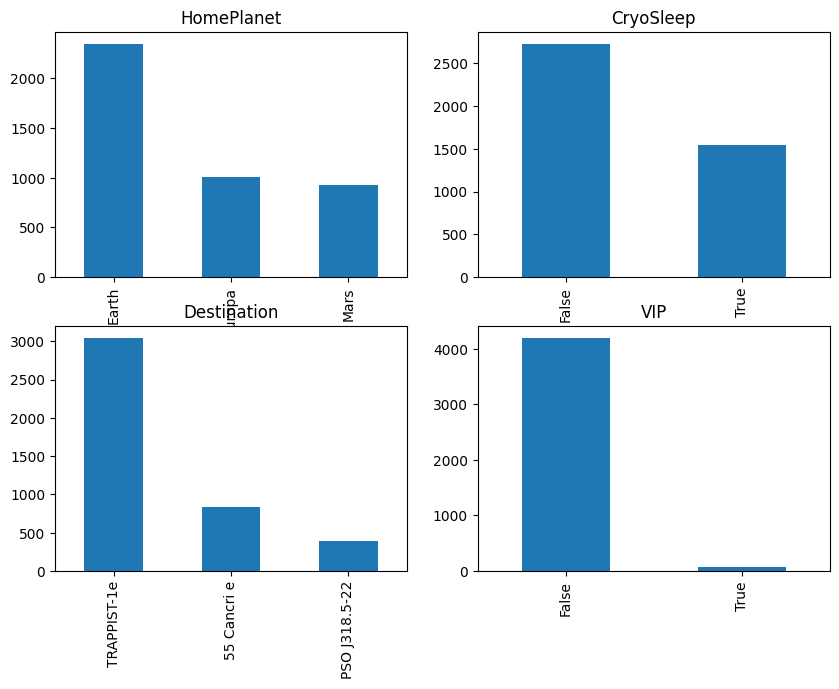

In [45]:
fig = plt.figure(figsize =(10, 7))
plt.subplot(2,2,1)
df_test['HomePlanet'].value_counts().plot(kind='bar',title='HomePlanet')
plt.subplot(2,2,2)
df_test['CryoSleep'].value_counts().plot(kind='bar',title='CryoSleep')
plt.subplot(2,2,3)
df_test['Destination'].value_counts().plot(kind='bar',title='Destination')
plt.subplot(2,2,4)
df_test['VIP'].value_counts().plot(kind='bar',title='VIP')

In [46]:
df_test['HomePlanet']=df_test['HomePlanet'].map({'Earth':0,'Europa':1,'Mars':2}).astype(int)

In [47]:
unique_destination=df_test['Destination'].unique()
df_test['Destination']=df_test['Destination'].map(dict(zip(unique_destination,list(range(len(unique_destination)))))).astype(int)

In [48]:
unique_VIP=df_test['VIP'].unique()
df_test['VIP']=df_test['VIP'].map(dict(zip(unique_VIP,list(range(len(unique_VIP)))))).astype(int)

In [49]:
unique_CryoSleep=df_test['CryoSleep'].unique()
df_test['CryoSleep']=df_test['CryoSleep'].map(dict(zip(unique_VIP,list(range(len(unique_VIP)))))).astype(int)

In [50]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,1,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0002_01,0,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,1,1
2,0003_01,1,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,0003_02,1,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0004_01,0,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,1


In [51]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Port
0,0013_01,0,1,0,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,3,1
1,0018_01,0,0,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,1,1
2,0019_01,1,1,1,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,6,1
3,0021_01,1,0,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,6,1
4,0023_01,0,0,0,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,1,1


In [52]:
df=df.drop(['Age'], axis=1)
df_test = df_test.drop(['Name','Age'], axis=1)

In [53]:
combine_data=[df, df_test]
df.shape,df_test.shape

((8693, 13), (4277, 12))

In [54]:
train_X=df.drop("Transported",axis=1)
train_y=df["Transported"]
test_X=df_test.copy()

In [55]:
train_X.shape,train_y.shape,test_X.shape

((8693, 12), (8693,), (4277, 12))

In [56]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)
Y_pred = decision_tree.predict(test_X)
accuracy_decision_tree = decision_tree.score(train_X, train_y) 
accuracy_decision_tree

1.0

In [57]:
Random_forest = RandomForestClassifier()
Random_forest.fit(train_X, train_y)
Y_pred = Random_forest.predict(test_X)
accuracy_Random_forest = Random_forest.score(train_X, train_y) 
accuracy_Random_forest

1.0

In [58]:
models = pd.DataFrame({'Model': ['Random Forest','Decision Tree'],'Score': [accuracy_decision_tree,accuracy_Random_forest]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Random Forest,1.0
1,Decision Tree,1.0


In [65]:

Y_pred[0:]

array([ True, False,  True, ...,  True,  True,  True])

In [69]:
id=df_test.PassengerId
x=df_test
Y_pred=Random_forest.predict(x)

In [71]:
output=pd.DataFrame({'PassengerId':id ,'Transported': Y_pred})
output['Transported']=output['Transported']
output

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [74]:
output.to_csv('submisson.csv',index=False)